In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Phishing/UNB/Multi/Base_classifier_result(URL-HTML cross)(2).csv")
data.head()

,labels,rfc_prediction_non,rfc_prediction_phish,rfc_prediction_spam,rfc_prediction_malware,rfc_prediction_defacemen,svc_prediction_non,svc_prediction_phish,svc_prediction_spam,svc_prediction_malware,svc_prediction_defacemen,lr_prediction_non,lr_prediction_phish,lr_prediction_spam,lr_prediction_malware,lr_prediction_defacemen
0,4,0.011508,0.004581,0.021867,0.007611,0.954432,0.504054,0.039650,0.045751,0.049365,0.361179,0.857927,0.000465,0.042540,0.002840,0.096227
1,2,0.100608,0.033275,0.780386,0.020569,0.065162,0.422278,0.079107,0.297047,0.106798,0.094770,0.250114,0.155323,0.211716,0.168736,0.214111
2,2,0.023659,0.116272,0.748871,0.021887,0.089311,0.131950,0.127239,0.209020,0.361777,0.170014,0.206046,0.193250,0.198365,0.198411,0.203928
3,3,0.123663,0.033559,0.025220,0.702551,0.115007,0.123007,0.129962,0.200915,0.374736,0.171379,0.202549,0.198721,0.199183,0.199595,0.199952
4,0,0.565631,0.042625,0.131673,0.066562,0.193508,0.234104,0.121611,0.238581,0.214531,0.191173,0.319656,0.114360,0.243179,0.109860,0.212945


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   labels                    6896 non-null   int64  
 1   rfc_prediction_non        6896 non-null   float64
 2   rfc_prediction_phish      6896 non-null   float64
 3   rfc_prediction_spam       6896 non-null   float64
 4   rfc_prediction_malware    6896 non-null   float64
 5   rfc_prediction_defacemen  6896 non-null   float64
 6   svc_prediction_non        6896 non-null   float64
 7   svc_prediction_phish      6896 non-null   float64
 8   svc_prediction_spam       6896 non-null   float64
 9   svc_prediction_malware    6896 non-null   float64
 10  svc_prediction_defacemen  6896 non-null   float64
 11  lr_prediction_non         6896 non-null   float64
 12  lr_prediction_phish       6896 non-null   float64
 13  lr_prediction_spam        6896 non-null   float64
 14  lr_predi

In [5]:
import numpy as np

y_f = data['labels']
x_f = data.drop('labels',axis=1)

x = np.array(x_f)
y = y_f.values



print(x.shape, y.shape)




(6896, 15) (6896,)


In [6]:
# one hot encoding

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()

encoder.fit(y)
en_y = encoder.transform(y)
dy = np_utils.to_categorical(en_y)



In [7]:
import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def model_aa(x_training, x_val, y_training, y_val, opt, early_stopping_monitor):

  model = Sequential()
  model.add(Dense(10, input_dim=15, activation='relu'))
  model.add(Dense(5, activation='sigmoid'))
  model.compile(optimizer = opt, loss='mse', metrics=["accuracy"])

  # print("check point")
  history = model.fit(x_training, y_training, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping_monitor])


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
  plt.show()

  print('Validation Accuracy: ')
  y_pred = model.predict(x_val)
  Y_pred_classes = np.argmax(y_pred,axis = 1) 
  Y_true = np.argmax(y_val,axis = 1) 


  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(Y_true, Y_pred_classes))

  #target_names = ['True', 'False']
  print(classification_report(Y_true, Y_pred_classes))


  print(confusion_matrix(Y_true, Y_pred_classes))


Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1993 - accuracy: 0.3369 - val_loss: 0.1677 - val_accuracy: 0.3449
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.1441 - accuracy: 0.5005 - val_loss: 0.1271 - val_accuracy: 0.6609
Epoch 3/100
194/194 [==============================] - 0s 2ms/step - loss: 0.1115 - accuracy: 0.7153 - val_loss: 0.0999 - val_accuracy: 0.7565
Epoch 4/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0896 - accuracy: 0.7433 - val_loss: 0.0808 - val_accuracy: 0.7884
Epoch 5/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0736 - accuracy: 0.8218 - val_loss: 0.0663 - val_accuracy: 0.9130
Epoch 6/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0607 - accuracy: 0.9281 - val_loss: 0.0545 - val_accuracy: 0.9319
Epoch 7/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0495 - accuracy: 0.9418 - val_loss: 0.0443 - val_accuracy: 0.9464

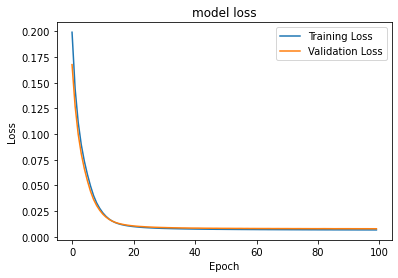

Validation Accuracy: 
Accuracy: 0.9710144927536232
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       212
           1       0.85      0.90      0.87        68
           2       0.99      0.97      0.98       154
           3       0.99      0.96      0.98       165
           4       0.98      1.00      0.99        91

    accuracy                           0.97       690
   macro avg       0.96      0.96      0.96       690
weighted avg       0.97      0.97      0.97       690

[[210   2   0   0   0]
 [  5  61   1   1   0]
 [  0   3 149   0   2]
 [  0   6   0 159   0]
 [  0   0   0   0  91]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1460 - accuracy: 0.6563 - val_loss: 0.0882 - val_accuracy: 0.8609
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0690 - accuracy: 0.8796 - val_loss: 0.0559 - val_accuracy: 0.8710
Epoch 3/100
194/194 [==============================] - 0s 

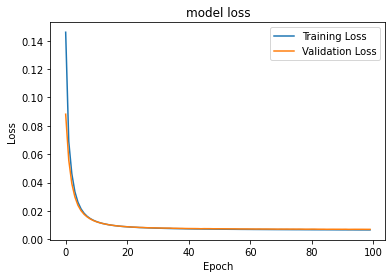

Validation Accuracy: 
Accuracy: 0.9782608695652174
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       224
           1       0.92      0.96      0.94        72
           2       0.98      0.98      0.98       156
           3       0.96      0.99      0.97       135
           4       1.00      0.98      0.99       103

    accuracy                           0.98       690
   macro avg       0.97      0.98      0.97       690
weighted avg       0.98      0.98      0.98       690

[[219   2   0   3   0]
 [  0  69   1   2   0]
 [  0   2 153   1   0]
 [  0   2   0 133   0]
 [  0   0   2   0 101]]
Epoch 1/100
194/194 [==============================] - 1s 4ms/step - loss: 0.1351 - accuracy: 0.6181 - val_loss: 0.0909 - val_accuracy: 0.8246
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0668 - accuracy: 0.8935 - val_loss: 0.0521 - val_accuracy: 0.9043
Epoch 3/100
194/194 [==============================] - 0s 

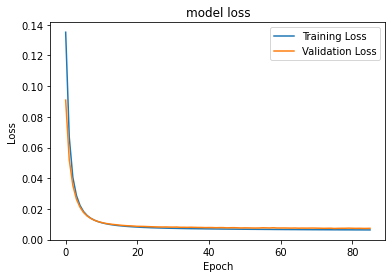

Validation Accuracy: 
Accuracy: 0.9753623188405797
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       213
           1       0.95      0.89      0.92        84
           2       0.98      0.98      0.98       133
           3       0.97      0.99      0.98       150
           4       0.99      1.00      1.00       110

    accuracy                           0.98       690
   macro avg       0.97      0.97      0.97       690
weighted avg       0.98      0.98      0.98       690

[[210   2   0   1   0]
 [  4  75   3   2   0]
 [  1   0 130   1   1]
 [  0   2   0 148   0]
 [  0   0   0   0 110]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1696 - accuracy: 0.4649 - val_loss: 0.1063 - val_accuracy: 0.8043
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0807 - accuracy: 0.8609 - val_loss: 0.0641 - val_accuracy: 0.8754
Epoch 3/100
194/194 [==============================] - 0s 

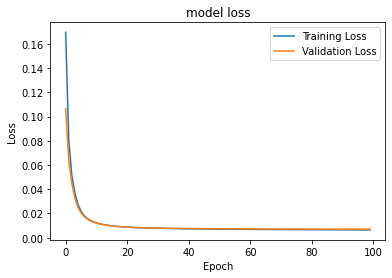

Validation Accuracy: 
Accuracy: 0.9782608695652174
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       237
           1       0.92      0.91      0.92        80
           2       0.98      0.98      0.98       128
           3       0.99      0.99      0.99       157
           4       0.98      0.99      0.98        88

    accuracy                           0.98       690
   macro avg       0.97      0.97      0.97       690
weighted avg       0.98      0.98      0.98       690

[[234   3   0   0   0]
 [  1  73   2   2   2]
 [  0   2 126   0   0]
 [  1   1   0 155   0]
 [  0   0   1   0  87]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1233 - accuracy: 0.6150 - val_loss: 0.0846 - val_accuracy: 0.8812
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0650 - accuracy: 0.8804 - val_loss: 0.0495 - val_accuracy: 0.8841
Epoch 3/100
194/194 [==============================] - 0s 

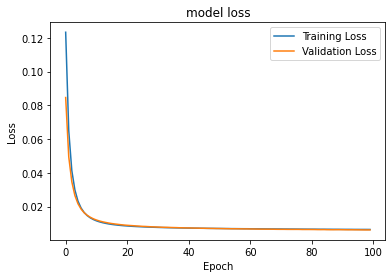

Validation Accuracy: 
Accuracy: 0.9782608695652174
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       230
           1       0.90      0.95      0.93        65
           2       0.98      0.95      0.97       138
           3       0.99      0.98      0.98       154
           4       0.96      1.00      0.98       103

    accuracy                           0.98       690
   macro avg       0.97      0.97      0.97       690
weighted avg       0.98      0.98      0.98       690

[[228   2   0   0   0]
 [  0  62   2   1   0]
 [  0   2 131   1   4]
 [  0   3   0 151   0]
 [  0   0   0   0 103]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1596 - accuracy: 0.4562 - val_loss: 0.1245 - val_accuracy: 0.6145
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.1116 - accuracy: 0.6790 - val_loss: 0.0923 - val_accuracy: 0.7493
Epoch 3/100
194/194 [==============================] - 0s 

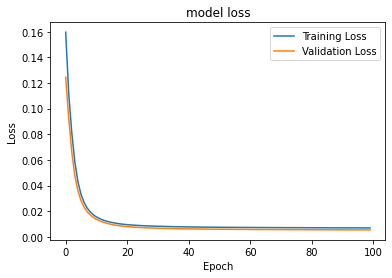

Validation Accuracy: 
Accuracy: 0.9826086956521739
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       239
           1       0.93      0.97      0.95        68
           2       0.98      0.97      0.98       135
           3       0.99      0.98      0.98       151
           4       0.99      0.99      0.99        97

    accuracy                           0.98       690
   macro avg       0.98      0.98      0.98       690
weighted avg       0.98      0.98      0.98       690

[[237   1   1   0   0]
 [  0  66   1   1   0]
 [  0   2 131   1   1]
 [  2   1   0 148   0]
 [  0   1   0   0  96]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1585 - accuracy: 0.5516 - val_loss: 0.1105 - val_accuracy: 0.8026
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0880 - accuracy: 0.8623 - val_loss: 0.0686 - val_accuracy: 0.8795
Epoch 3/100
194/194 [==============================] - 0s 

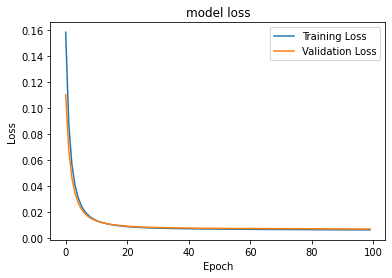

Validation Accuracy: 
Accuracy: 0.9796806966618288
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       214
           1       0.90      0.97      0.94        67
           2       0.98      0.99      0.99       125
           3       0.98      0.98      0.98       165
           4       0.98      1.00      0.99       118

    accuracy                           0.98       689
   macro avg       0.97      0.98      0.98       689
weighted avg       0.98      0.98      0.98       689

[[206   4   0   3   1]
 [  0  65   1   0   1]
 [  0   1 124   0   0]
 [  0   2   1 162   0]
 [  0   0   0   0 118]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1370 - accuracy: 0.6372 - val_loss: 0.0975 - val_accuracy: 0.8795
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0793 - accuracy: 0.8787 - val_loss: 0.0596 - val_accuracy: 0.9231
Epoch 3/100
194/194 [==============================] - 0s 

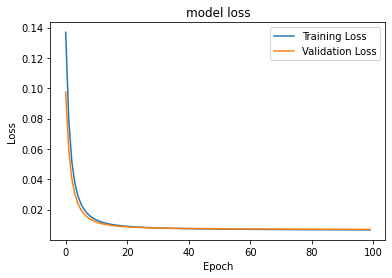

Validation Accuracy: 
Accuracy: 0.9811320754716981
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       240
           1       0.95      0.93      0.94        60
           2       0.97      0.97      0.97       139
           3       0.98      0.99      0.98       148
           4       0.98      1.00      0.99       102

    accuracy                           0.98       689
   macro avg       0.98      0.98      0.98       689
weighted avg       0.98      0.98      0.98       689

[[237   1   1   1   0]
 [  1  56   2   0   1]
 [  0   1 135   2   1]
 [  0   1   1 146   0]
 [  0   0   0   0 102]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1603 - accuracy: 0.6185 - val_loss: 0.1043 - val_accuracy: 0.7184
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0831 - accuracy: 0.7724 - val_loss: 0.0707 - val_accuracy: 0.8534
Epoch 3/100
194/194 [==============================] - 0s 

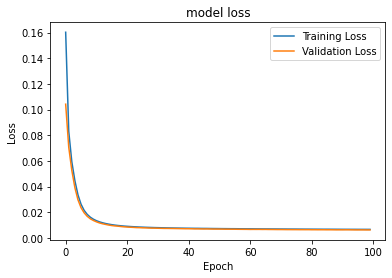

Validation Accuracy: 
Accuracy: 0.9796806966618288
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       209
           1       0.96      0.93      0.95        74
           2       0.99      0.97      0.98       129
           3       0.99      0.98      0.98       166
           4       0.98      0.99      0.99       111

    accuracy                           0.98       689
   macro avg       0.98      0.97      0.98       689
weighted avg       0.98      0.98      0.98       689

[[208   0   1   0   0]
 [  4  69   0   1   0]
 [  0   2 125   0   2]
 [  2   1   0 163   0]
 [  0   0   0   1 110]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1645 - accuracy: 0.5597 - val_loss: 0.1029 - val_accuracy: 0.7649
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0839 - accuracy: 0.8428 - val_loss: 0.0670 - val_accuracy: 0.9492
Epoch 3/100
194/194 [==============================] - 0s 

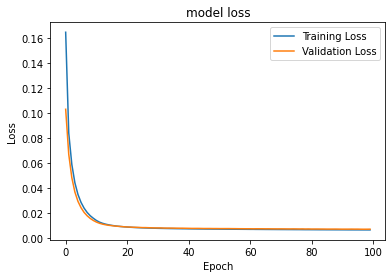

Validation Accuracy: 
Accuracy: 0.9724238026124818
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       214
           1       0.89      0.95      0.92        58
           2       0.97      0.96      0.96       137
           3       0.99      0.97      0.98       181
           4       0.97      1.00      0.99        99

    accuracy                           0.97       689
   macro avg       0.96      0.97      0.97       689
weighted avg       0.97      0.97      0.97       689

[[209   2   3   0   0]
 [  2  55   1   0   0]
 [  1   2 131   1   2]
 [  1   3   0 176   1]
 [  0   0   0   0  99]]


In [8]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)


from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)


kf = KFold(n_splits=10, random_state=10, shuffle=True)
for train, val in kf.split(x, dy):
  model_aa(x[train], x[val], dy[train], dy[val], optimizer1, early_stopping_monitor)